In [1]:

%matplotlib inline
import pandas as pd
import itertools

from matplotlib import pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation
import sys

datatypelist=[]
f1="/Users/irffanalahi/Research/Research_update/Erin/test13ctref/ontothealthy/compare/cfDNA_cw13ct_hypo_top150dmr_t1_0.15_t2_0.15_mincpg2_results_transposedtomyversion.txt"
df1=pd.read_csv(f1,sep="\t")
tmpdata='New healthy'
df1['data']=tmpdata
datatypelist.append(tmpdata)

f2="/Users/irffanalahi/Research/Research_update/Erin/test13ctref/ontothealthy/compare/ref13ct_mincpg2_q0.5_q0.01_diff0.05_hypo_top150dmr_t1_0.15_t2_0.15.txt_result_nocov_mincpg2_ABSreadcount_divisioned.txt_CSxOut_healthy.txt"
df2=pd.read_csv(f2,sep="\t")
tmpdata='Previous healthy'
df2['data']=tmpdata
datatypelist.append(tmpdata)

f3="/Users/irffanalahi/Research/Research_update/Erin/test13ctref/ontothealthy/compare/ref13ct_mincpg2_q0.5_q0.01_diff0.05_hypo_top150dmr_t1_0.15_t2_0.15.txt_result_nocov_mincpg2_ABSreadcount_divisioned.txt_CSxOut.txt"
df3=pd.read_csv(f3,sep="\t")
tmpdata='CRC'
df3['data']=tmpdata
datatypelist.append(tmpdata)


outputfile=f3

dflist=[df1,df2,df3] ###########


valuevars=['CD4','CD8','NK','nB','cB','PC','Mn','M0','M1','M2','iDC','mDC','mNeu']


#valuevars=['Plasma vol. (ml)','cfDNA amount (ng)','cfDNA amount (ng/ml)','Total cfDNA amt (ng) including previous extractions','Bioanalyzer 70bp-450bp percentage']#	'Indexing PCR cycles'	Final Lib. Conc. (ng/ul)	Elution vol. (ul)	Total amount of Lib (ng)
len(valuevars)

13

In [2]:

alldf = pd.concat(dflist)
alldf.head()

,Mixture,cB,CD4,CD8,iDC,M0,M1,M2,mDC,Mn,mNeu,nB,NK,PC,data
0,NU41,0.024540,0.112474,0.050993,0.188153,0.027888,0.137778,0.039031,0.189055,0.069506,0.250000,0.054404,0.060877,0.033593,New healthy
1,NU47,0.026638,0.070681,0.036010,0.236111,0.054795,0.163158,0.048354,0.155844,0.099243,0.378855,0.036364,0.037241,0.030837,New healthy
2,NU46,0.024831,0.058337,0.028220,0.220264,0.068966,0.207101,0.043169,0.168539,0.095098,0.431472,0.044863,0.037297,0.033953,New healthy
3,NU45,0.027679,0.076243,0.033086,0.222591,0.183908,0.159624,0.055708,0.162996,0.080159,0.313072,0.034850,0.037867,0.033202,New healthy
4,NU44,0.031646,0.076821,0.030675,0.216216,0.030000,0.088398,0.059467,0.177143,0.096018,0.289200,0.044068,0.042546,0.051790,New healthy


In [3]:
mdf = pd.melt(alldf, id_vars=['data'], value_vars=valuevars)

In [4]:
def combine_box_pairs(samples, cell_types):
    box_pairs = []
    for cell in cell_types:
        pairs = []
        for sample in samples:
            pairs.append((cell, sample))
        for i in range(len(samples)):
            try:
                box_pairs.append((pairs[i], pairs[i + 1]))
            except IndexError:
                box_pairs.append((pairs[i], pairs[0]))
    return box_pairs

Box_pairs = combine_box_pairs(datatypelist, valuevars)
print(Box_pairs)

[(('CD4', 'New healthy'), ('CD4', 'Previous healthy')), (('CD4', 'Previous healthy'), ('CD4', 'CRC')), (('CD4', 'CRC'), ('CD4', 'New healthy')), (('CD8', 'New healthy'), ('CD8', 'Previous healthy')), (('CD8', 'Previous healthy'), ('CD8', 'CRC')), (('CD8', 'CRC'), ('CD8', 'New healthy')), (('NK', 'New healthy'), ('NK', 'Previous healthy')), (('NK', 'Previous healthy'), ('NK', 'CRC')), (('NK', 'CRC'), ('NK', 'New healthy')), (('nB', 'New healthy'), ('nB', 'Previous healthy')), (('nB', 'Previous healthy'), ('nB', 'CRC')), (('nB', 'CRC'), ('nB', 'New healthy')), (('cB', 'New healthy'), ('cB', 'Previous healthy')), (('cB', 'Previous healthy'), ('cB', 'CRC')), (('cB', 'CRC'), ('cB', 'New healthy')), (('PC', 'New healthy'), ('PC', 'Previous healthy')), (('PC', 'Previous healthy'), ('PC', 'CRC')), (('PC', 'CRC'), ('PC', 'New healthy')), (('Mn', 'New healthy'), ('Mn', 'Previous healthy')), (('Mn', 'Previous healthy'), ('Mn', 'CRC')), (('Mn', 'CRC'), ('Mn', 'New healthy')), (('M0', 'New healthy'

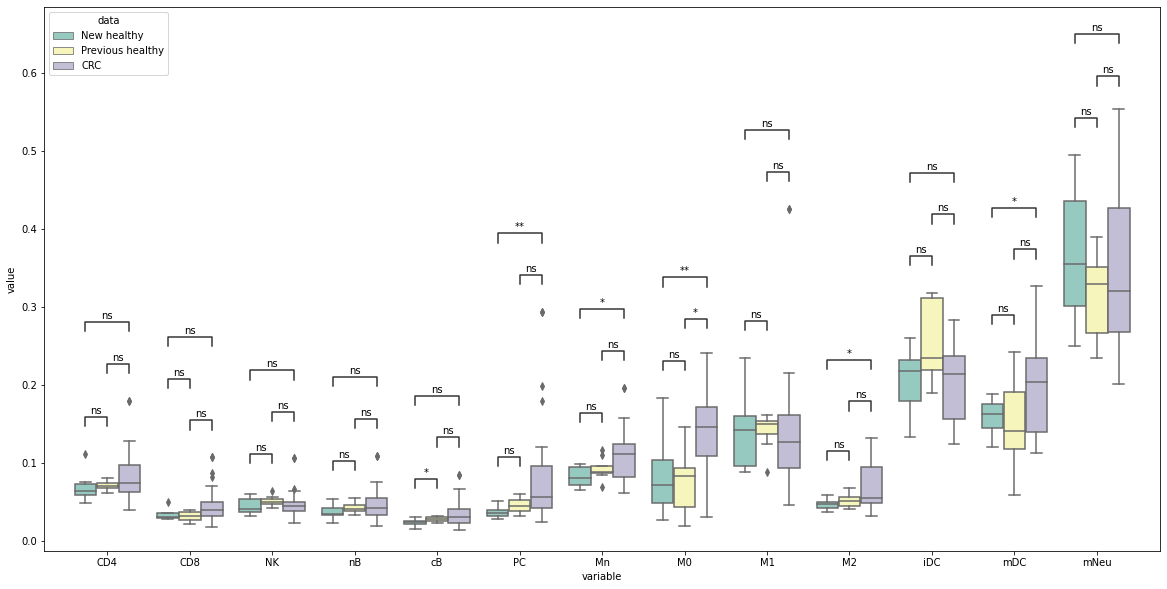

In [5]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(x="variable", y="value", hue="data", data=mdf,palette="Set3") 

# Box_pairs=[(("cB","New healthy"),("cB","CRC"))]

original_stdout = sys.stdout

with open('p_vals.txt', 'w') as f:
    sys.stdout = f # Change the standard output to the file we created.
    test_results = add_stat_annotation(ax,data=mdf, x="variable", y="value", hue="data",box_pairs=Box_pairs,
                                   test='Mann-Whitney', text_format='star', comparisons_correction=None)
    sys.stdout = original_stdout # Reset the standard output to its original value
    f.close()

plt.show()

ax.figure.savefig(outputfile+"_all.pdf",dpi=300, bbox_inches='tight')
#plt.savefig('example_non-hue_outside_all.png', dpi=300, bbox_inches='tight')

In [6]:
file_out = open('p_vals.txt', 'r')
Lines = file_out.readlines()
file_out.close()

sig_list = []

for line in Lines:
    if 'P_val' in line:
        split = line.split(' ')
        for name in split:
            if 'P_val' in name:
                res = name.split('=')
                if float(res[1]) < 0.05:
                    new_line = line.split('_')
                    cell = new_line[0]
                    val1 = new_line[1].split(' v.s.')[0]
                    val2 = new_line[2].split(':')[0]
                    sig_list.append(((cell, val1), (cell, val2)))

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

cB_New healthy v.s. cB_Previous healthy: Mann-Whitney-Wilcoxon test two-sided, P_val=2.789e-02 U_stat=1.900e+01
M0_Previous healthy v.s. M0_CRC: Mann-Whitney-Wilcoxon test two-sided, P_val=1.216e-02 U_stat=3.600e+01
PC_New healthy v.s. PC_CRC: Mann-Whitney-Wilcoxon test two-sided, P_val=3.698e-03 U_stat=5.400e+01
Mn_New healthy v.s. Mn_CRC: Mann-Whitney-Wilcoxon test two-sided, P_val=1.172e-02 U_stat=6.500e+01
M0_New healthy v.s. M0_CRC: Mann-Whitney-Wilcoxon test two-sided, P_val=7.043e-03 U_stat=6.000e+01
M2_New healthy v.s. M2_CRC: Mann-Whitney-Wilcoxon test two-sided, P_val=3.251e-02 U_stat=7.600e+01
mDC_New healthy v.s. mDC_CRC: Mann-Whitney-Wilcoxon test two-sided, P_val=4.198e-02 U_stat=7.900e+01


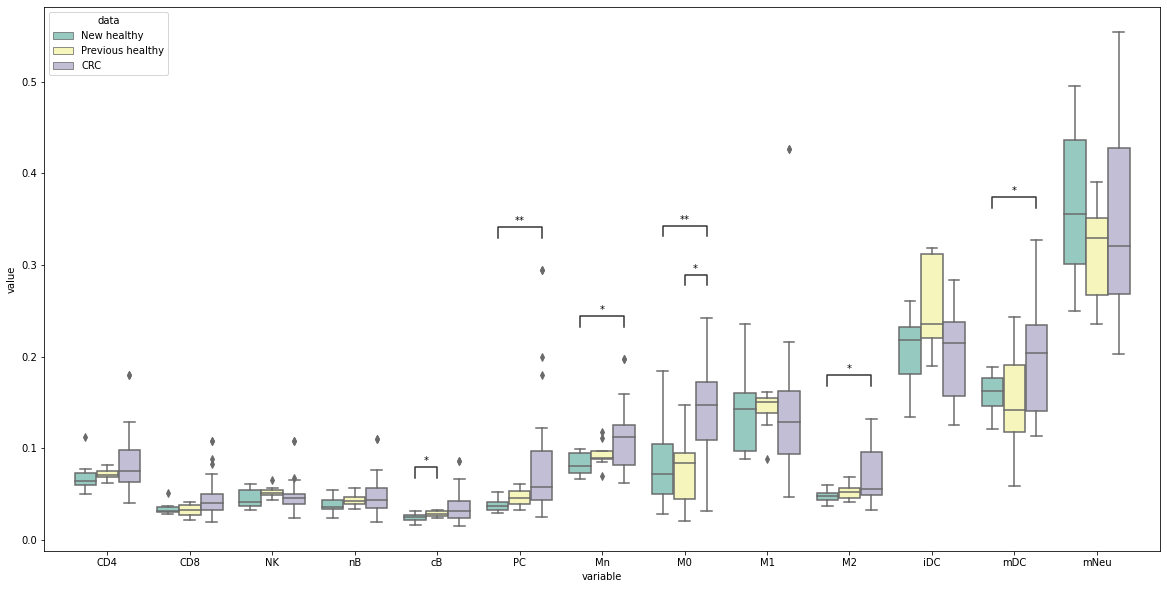

In [7]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(x="variable", y="value", hue="data", data=mdf,palette="Set3") 

# Box_pairs=[(("cB","New healthy"),("cB","CRC"))]

test_results = add_stat_annotation(ax,data=mdf, x="variable", y="value", hue="data",box_pairs=sig_list,
                                   test='Mann-Whitney', text_format='star', comparisons_correction=None)

plt.show()

ax.figure.savefig(outputfile+"_significant.pdf",dpi=300, bbox_inches='tight')
#plt.savefig('example_non-hue_outside_significant.png', dpi=300, bbox_inches='tight')